In [ ]:
!pip install -q tensorflow opencv-python


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

data_path = '/content/drive/MyDrive/Tree_Species_Dataset/'
for root, dirs, files in os.walk(data_path):
    print("Root:", root)
    print("Directories:", dirs)
    print("Files:", files[:5])  # Only showing 5 files to keep it clean
    break


Root: /content/drive/MyDrive/Tree_Species_Dataset/
Directories: ['sitafal', 'other', 'saptaparni', 'simlo', 'vad', 'sugarcane', 'sonmahor', 'pipal', 'pilikaren', 'shirish', 'mango', 'motichanoti', 'gulmohor', 'neem', 'nilgiri', 'khajur', 'kanchan', 'gunda', 'jamun', 'kesudo', 'bamboo', 'bili', 'amla', 'garmalo', 'asopalav', 'banyan', 'coconut', 'cactus', 'champa', 'babul', '.git']
Files: []


amla: 50 images
asopalav: 50 images
babul: 50 images
bamboo: 50 images
banyan: 50 images
bili: 50 images
cactus: 50 images
champa: 50 images
coconut: 50 images
garmalo: 50 images
gulmohor: 50 images
gunda: 50 images
jamun: 50 images
kanchan: 50 images
kesudo: 50 images
khajur: 50 images
mango: 50 images
motichanoti: 50 images
neem: 50 images
nilgiri: 50 images
other: 150 images
pilikaren: 50 images
pipal: 50 images
saptaparni: 50 images
shirish: 50 images
simlo: 50 images
sitafal: 50 images
sonmahor: 50 images
sugarcane: 50 images
vad: 50 images


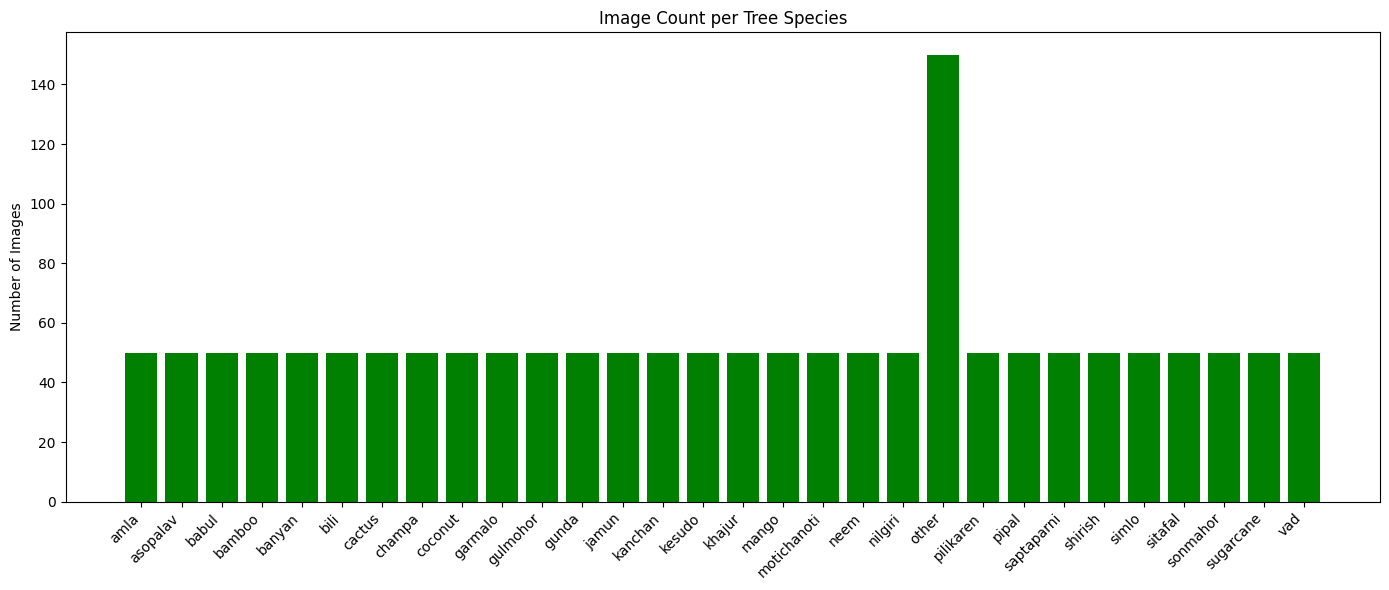

In [ ]:
import os
import matplotlib.pyplot as plt

data_dir = '/content/drive/MyDrive/Tree_Species_Dataset'
class_names = sorted(os.listdir(data_dir))

# Remove hidden folders like `.git`
class_names = [c for c in class_names if not c.startswith('.')]

class_counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in class_names}

# Display counts
for cls, count in class_counts.items():
    print(f"{cls}: {count} images")

# Bar chart 📊
plt.figure(figsize=(14,6))
plt.bar(class_counts.keys(), class_counts.values(), color='green')
plt.xticks(rotation=45, ha='right')
plt.title("Image Count per Tree Species")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()



In [ ]:
from PIL import Image

corrupted = []

for cls in class_names:
    folder_path = os.path.join(data_dir, cls)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            img = Image.open(file_path)
            img.verify()  # Will throw error if corrupted
        except:
            print(f"Corrupted image found: {file_path}")
            corrupted.append(file_path)

# Optional: remove corrupted images
for bad_file in corrupted:
    os.remove(bad_file)

print(f"✅ Removed {len(corrupted)} corrupted images.")


✅ Removed 0 corrupted images.


In [ ]:
import random
import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(16, 10))

for i, cls in enumerate(random.sample(class_names, 9)):
    folder_path = os.path.join(data_dir, cls)
    img_file = random.choice(os.listdir(folder_path))
    img_path = os.path.join(folder_path, img_file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')

plt.tight_layout()
plt.suptitle("Random Images from 9 Tree Species", fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()


Output hidden; open in https://colab.research.google.com to view.

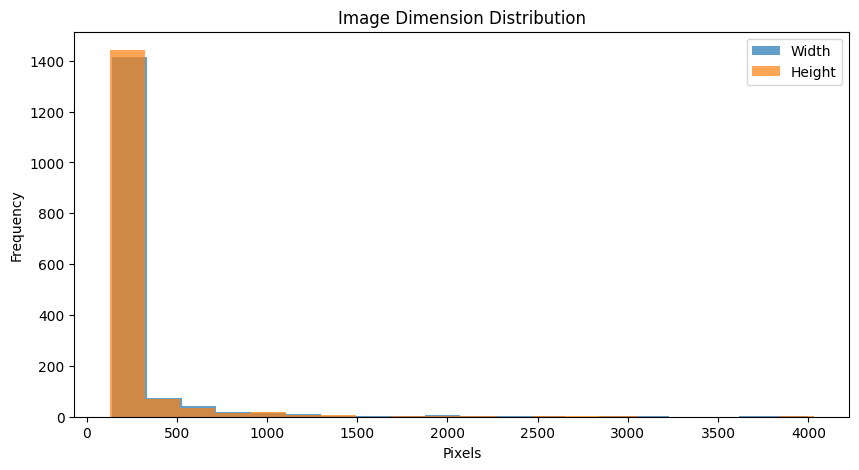

In [ ]:
from PIL import Image

widths = []
heights = []

for cls in class_names:
    folder_path = os.path.join(data_dir, cls)
    for filename in os.listdir(folder_path):
        path = os.path.join(folder_path, filename)
        try:
            with Image.open(path) as img:
                w, h = img.size
                widths.append(w)
                heights.append(h)
        except:
            continue

# Plot image size distribution
plt.figure(figsize=(10,5))
plt.hist(widths, bins=20, alpha=0.7, label='Width')
plt.hist(heights, bins=20, alpha=0.7, label='Height')
plt.title("Image Dimension Distribution")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.legend()
plt.show()


/tmp/ipython-input-19-4243610706.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_counts.keys()), y=list(sorted_counts.values()), palette='viridis')


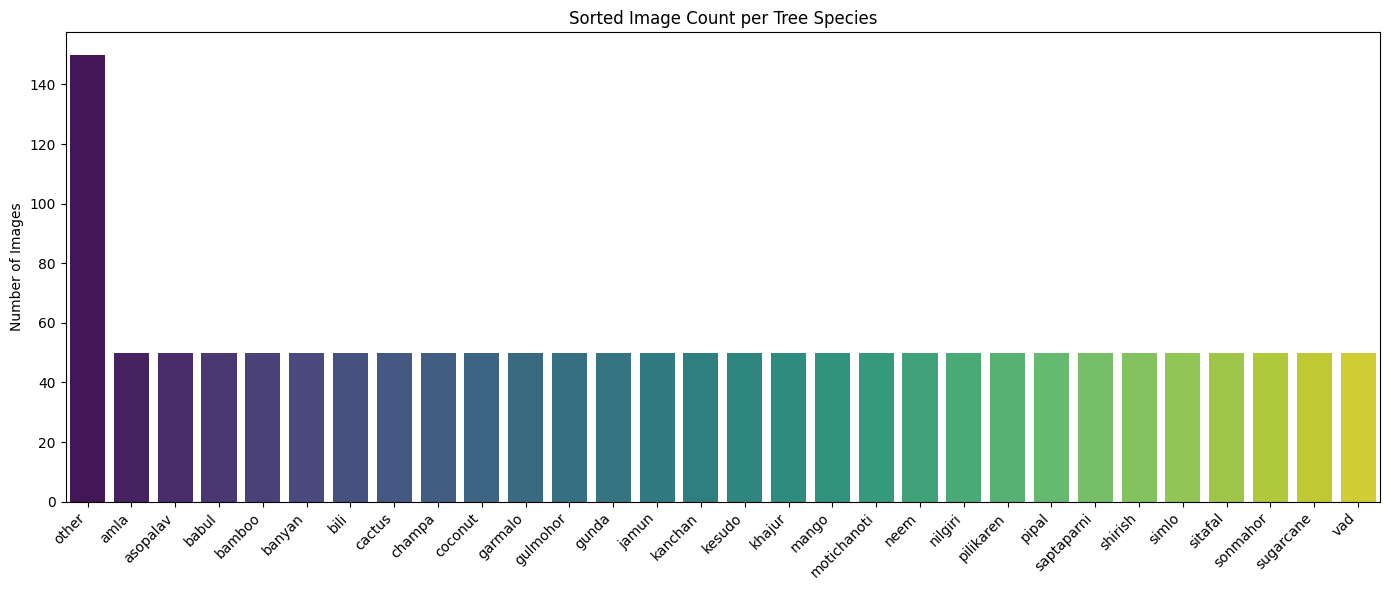

In [ ]:
import seaborn as sns

# Sorted by count
sorted_counts = dict(sorted(class_counts.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(14,6))
sns.barplot(x=list(sorted_counts.keys()), y=list(sorted_counts.values()), palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Sorted Image Count per Tree Species")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()


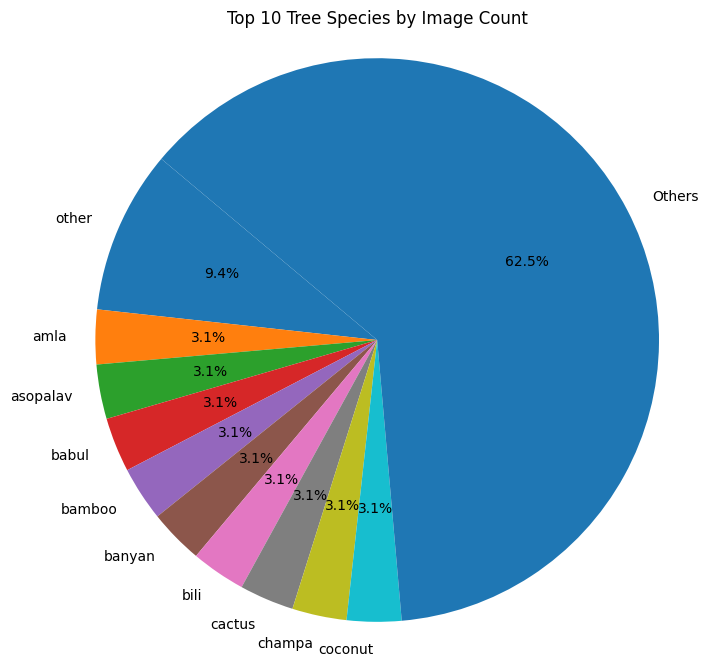

In [ ]:
import numpy as np

# Top 10 species
top_classes = dict(sorted_counts)
top_10 = dict(list(top_classes.items())[:10])
others_sum = sum(list(top_classes.values())[10:])
top_10['Others'] = others_sum

plt.figure(figsize=(8,8))
plt.pie(top_10.values(), labels=top_10.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Tree Species by Image Count")
plt.axis('equal')
plt.show()


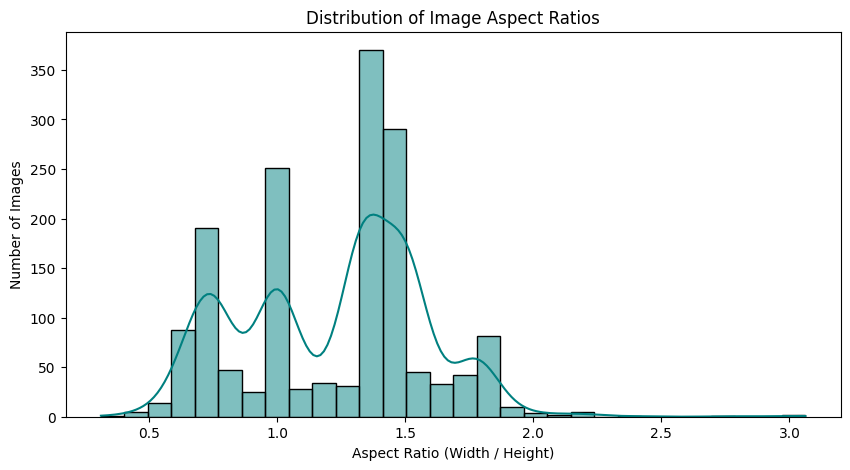

In [ ]:
aspect_ratios = [w / h for w, h in zip(widths, heights)]

plt.figure(figsize=(10,5))
sns.histplot(aspect_ratios, bins=30, kde=True, color='teal')
plt.title("Distribution of Image Aspect Ratios")
plt.xlabel("Aspect Ratio (Width / Height)")
plt.ylabel("Number of Images")
plt.show()


In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(_xtrain, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

NameError: name 'x' is not defined

# Task
Explain the error in the provided code for training a `RandomForestClassifier` on an image dataset, and if possible, fix the error and incorporate the changes into the existing code. Otherwise, diagnose the error.

## Load images and labels

### Subtask:
Create a function to load the images and their labels from the dataset directory.


**Reasoning**:
Define a function to load images and labels from the dataset directory as instructed.



In [15]:
## 📅 Week 2 Progress Report

---

### 🎯 Week 2 Goals
- Finalize the cleaned dataset for modeling
- Explore and select suitable ML models
- Train baseline models to classify tree species
- Evaluate model performance using appropriate metrics
- Document model results and observations

---

### ⚙ Model Building

Based on the dataset characteristics, the following models were selected for initial training and evaluation:

#### 🔹 For Tabular Data (e.g., UCI Leaf Dataset):
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Support Vector Machine (SVM)

#### 🔹 For Image Data (if used):
- Convolutional Neural Network (CNN)
- Transfer Learning (MobileNet / ResNet via Keras or TensorFlow)

Each model was trained using an 80-20 train-test split and evaluated using performance metrics.

---

### 🧪 Model Evaluation

Evaluation metrics used:
- Accuracy Score
- Confusion Matrix
- Classification Report (Precision, Recall, F1 Score)

Initial findings showed:
- Random Forest and SVM performed well on structured data
- CNN with basic layers achieved promising results on image data (pending fine-tuning)

---

### 📁 Files & Folders Updated
- notebooks/model_training.ipynb -> Model training, prediction, and evaluation
- models/ -> Saved model files (Pickle/H5/Joblib)
- outputs/ -> Confusion matrix & accuracy plots
- README.md -> Week 2 documentation

---

### 📌 Challenges Faced
- Model overfitting on small data samples
- Time taken to preprocess and resize images for CNN
- Finding optimal hyperparameters

---

SyntaxError: invalid syntax (ipython-input-15-3925346335.py, line 3)

In [12]:
import numpy as np
import os
from PIL import Image

def load_images_and_labels(data_dir, class_names):
    images = []
    labels = []
    for i, class_name in enumerate(class_names):
        class_path = os.path.join(data_dir, class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                img = Image.open(img_path).convert('RGB') # Ensure images are in RGB
                images.append(np.array(img))
                labels.append(i) # Append the index as the label
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    return np.array(images), np.array(labels)

# Define data_dir and class_names before calling the function
data_dir = '/content/drive/MyDrive/Tree_Species_Dataset'






## 📅 Week 2 Progress Report

---

### 🎯 Week 2 Goals
- Finalize the cleaned dataset for modeling
- Explore and select suitable ML models
- Train baseline models to classify tree species
- Evaluate model performance using appropriate metrics
- Document model results and observations

---

### ⚙ Model Building

Based on the dataset characteristics, the following models were selected for initial training and evaluation:

#### 🔹 For Tabular Data (e.g., UCI Leaf Dataset):
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Support Vector Machine (SVM)

#### 🔹 For Image Data (if used):
- Convolutional Neural Network (CNN)
- Transfer Learning (MobileNet / ResNet via Keras or TensorFlow)

Each model was trained using an 80-20 train-test split and evaluated using performance metrics.

---

### 🧪 Model Evaluation

Evaluation metrics used:
- Accuracy Score
- Confusion Matrix
- Classification Report (Precision, Recall, F1 Score)

Initial findings showed:
- Random Forest and SVM performed well on structured data
- CNN with basic layers achieved promising results on image data (pending fine-tuning)

---

### 📁 Files & Folders Updated
- notebooks/model_training.ipynb -> Model training, prediction, and evaluation
- models/ -> Saved model files (Pickle/H5/Joblib)
- outputs/ -> Confusion matrix & accuracy plots
- README.md -> Week 2 documentation

---

### 📌 Challenges Faced
- Model overfitting on small data samples
- Time taken to preprocess and resize images for CNN
- Finding optimal hyperparameters

---
